In [68]:
# Reload the notebook automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import

In [69]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output

WORK_DIR = Path(Path.cwd()).parent
sys.path.append(str(WORK_DIR))
from src import ROOT, parse
from src.models import get_model
from src.datasets.transforms import *
from src.datasets import get_dataset, get_dataloader
from src.utils import *

cfg_dir = 'mlcv-exp/data/cfg/'

# Setup

In [70]:
dataset = 'fpha'
model_name = 'hpo_bbox_ar'
exp = 'exp1'
epoch = 200
cfg_name = '{}_{}_{}.cfg'.format(dataset, model_name, exp)
cfg = parse(Path(ROOT)/cfg_dir/model_name/cfg_name)
cfg['aug'] = None
cfg['batch_size'] = 1
cfg['shuffle'] = None
model = get_model(cfg, 'test', epoch)

In [80]:
model_net_mode = 'eval'
if model_net_mode == 'eval':
    model.net.eval()
elif model_net_mode == 'train':
    model.net.train()
clear_output()

# Loading

In [81]:
# dataloader = get_dataloader(cfg, get_dataset(cfg, 'test'))
dataloader = None

In [82]:
img_path = Path('First_Person_Action_Benchmark')/'Video_files_rsz'/'Subject_1/open_juice_bottle/1/color/color_0009.jpeg'
# img_path = Path('EPIC_KITCHENS_2018')/'EK_frames'/'P03/P03_10_7118_open_juice'/'img_{:05d}.jpg'.format(0)
# img_path = Path('EPIC_KITCHENS_2018')/'EK_frames'/'P03/P03_10_7118_open_juice'/'img_{:05d}.jpg'.format(100)
# img_path = Path('EPIC_KITCHENS_2018')/'EK_frames'/'P01/P01_03_502_put-down_milk'/'img_{:05d}.jpg'.format(49)
# img_path = Path('EPIC_KITCHENS_2018')/'EK_frames'/'P20/P20_03_21943_open_drawer'/'img_{:05d}.jpg'.format(100)

In [83]:
if dataloader:
    img, *others = next(iter(dataloader))
    img = img.cuda()
else:    
    img = get_img_dataloader(str(Path(ROOT)/img_path), 416)
    img = img.unsqueeze(0).cuda()

# Show Img

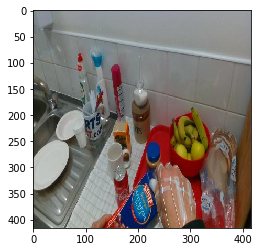

In [84]:
img_show = ImgToNumpy()(img.cpu())[0]
fig, ax = plt.subplots()
ax.imshow(img_show)
plt.show()

# Detect

open_juice_bottle juice
[259.81033897 353.42358971  87.95706129 136.87721443   0.99683136]


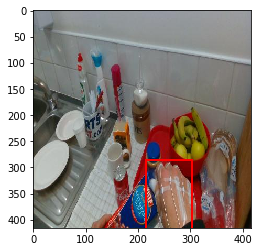

In [85]:
model.detect(img)

In [86]:
# seq_name = 'P20/P20_03_21943_open_drawer'
# seq_name = 'P03/P03_10_7118_open_juice'
# seq_name = 'P01/P01_03_502_put-down_milk'
# seq_name = 'P29/P29_04_35766_search-for_scissors'
# seq_name = 'P02/P02_09_5236_pour_salt'
# seq_name = 'P22/P22_07_25388_wash_sponge'
# seq_name = 'P23/P23_02_29040_search-for_table'
# seq_name = 'P23/P23_04_29398_take_cover'
# seq_name = 'P23/P23_03_29247_put_box'
# seq_name = 'P23/P23_04_29257_take-out_tap'
# seq_name = 'P23/P23_01_28990_close_tap'
seq_name = 'P23/P23_02_29021_take_garlic'

seq_path = Path(ROOT)/'EPIC_KITCHENS_2018'/'EK_frames'/seq_name

In [87]:
# seq_name = 'Subject_1/open_juice_bottle/1/color'
# seq_name = 'Subject_4/put_salt/2/color'
# seq_name = 'Subject_5/open_milk/4/color'
# seq_name = 'Subject_2/wash_sponge/4/color'
# seq_name = 'Subject_2/handshake/1/color'
# seq_name = 'Subject_2/use_flash/2/color'
# # seq_name = 'Subject_2/charge_cell_phone/1/color'
# seq_path =  Path(ROOT)/'First_Person_Action_Benchmark'/'Video_files_rsz'/seq_name



  0%|          | 0/75 [00:00<?, ?it/s]

  1%|▏         | 1/75 [00:00<00:10,  6.88it/s]

  3%|▎         | 2/75 [00:00<00:10,  6.84it/s]

  4%|▍         | 3/75 [00:00<00:11,  6.25it/s]

  5%|▌         | 4/75 [00:00<00:11,  5.98it/s]

  7%|▋         | 5/75 [00:00<00:11,  5.90it/s]

  8%|▊         | 6/75 [00:00<00:11,  6.16it/s]

  9%|▉         | 7/75 [00:01<00:11,  5.94it/s]

 11%|█         | 8/75 [00:01<00:11,  5.86it/s]

 13%|█▎        | 10/75 [00:01<00:09,  6.64it/s]

 15%|█▍        | 11/75 [00:01<00:09,  7.09it/s]

 16%|█▌        | 12/75 [00:01<00:08,  7.12it/s]

 17%|█▋        | 13/75 [00:01<00:09,  6.65it/s]

 20%|██        | 15/75 [00:02<00:08,  7.00it/s]

 21%|██▏       | 16/75 [00:02<00:09,  6.12it/s]

 23%|██▎       | 17/75 [00:02<00:08,  6.68it/s]

 24%|██▍       | 18/75 [00:02<00:07,  7.18it/s]

 25%|██▌       | 19/75 [00:02<00:09,  6.16it/s]

 27%|██▋       | 20/75 [00:03<00:08,  6.49it/s]

 28%|██▊       | 21/75 [00:03<00:08,  6.27it/s]

 29%|██▉       | 22/75 [00:03<00:08

give_card card
MoviePy - Building file /mnt/4TB/aaron/mlcv-exp/data/saved/detect_P23_P23_02_29021_take_garlic_fpha_hpo_bbox_ar_exp1_200_eval.gif with imageio.




t:   8%|▊         | 6/75 [00:00<00:02, 24.12it/s, now=None]

t:  12%|█▏        | 9/75 [00:00<00:02, 22.36it/s, now=None]

t:  15%|█▍        | 11/75 [00:00<00:03, 19.90it/s, now=None]

t:  17%|█▋        | 13/75 [00:00<00:03, 19.83it/s, now=None]

t:  20%|██        | 15/75 [00:00<00:03, 19.14it/s, now=None]

t:  23%|██▎       | 17/75 [00:00<00:03, 17.61it/s, now=None]

t:  25%|██▌       | 19/75 [00:01<00:03, 16.59it/s, now=None]

t:  28%|██▊       | 21/75 [00:01<00:03, 15.79it/s, now=None]

t:  31%|███       | 23/75 [00:01<00:03, 15.10it/s, now=None]

t:  33%|███▎      | 25/75 [00:01<00:03, 14.29it/s, now=None]

t:  36%|███▌      | 27/75 [00:01<00:03, 14.59it/s, now=None]

t:  40%|████      | 30/75 [00:01<00:02, 16.40it/s, now=None]

t:  44%|████▍     | 33/75 [00:01<00:02, 17.80it/s, now=None]

t:  48%|████▊     | 36/75 [00:01<00:02, 18.95it/s, now=None]

t:  51%|█████     | 38/75 [00:02<00:02, 17.46it/s, now=None]

t:  53%|█████▎    | 40/75 [00:02<00:02, 16.95it/s, now=None]

t:  57%|

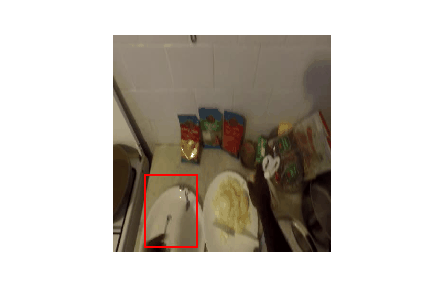

In [88]:
model.detect_video(seq_path, seq_name, model_info='{}_{}_{}_{}_{}'.format(dataset, model_name, exp, epoch, model_net_mode))
# model.detect_video(seq_path, img_size=416)